In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Data Analysis_Bootcamp\Data Mining Project\advertising_with_missing_values.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,NaN,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,NaN,66.2,25.5


In [3]:
# removing duplicates
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,NaN,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,NaN,66.2,25.5


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,187.000000,178.000000,178.000000,200.000000
mean,146.285027,22.642135,30.496629,15.130500
std,86.125982,14.994084,21.753267,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,72.650000,9.300000,11.675000,11.000000
50%,149.800000,21.050000,26.000000,16.000000
75%,218.050000,35.750000,45.175000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Chicking If There Is Any Missing Values
missing_values = df.isnull().sum()
print(missing_values)

TV           13
Radio        22
Newspaper    22
Sales         0
dtype: int64


In [6]:
# Dealing with missing values with the MEAN techneque
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df[['TV', 'Radio' , 'Newspaper']] = imputer.fit_transform(df[['TV', 'Radio'  , 'Newspaper']])

# Chicking If There Is Any Missing Values
missing_values = df.isnull().sum()
print(missing_values)


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.800000,69.200000,22.1
1,44.5,39.300000,45.100000,10.4
2,17.2,45.900000,69.300000,12.0
3,151.5,41.300000,58.500000,16.5
4,180.8,10.800000,58.400000,17.9
...,...,...,...,...
195,38.2,3.700000,30.496629,7.6
196,94.2,4.900000,8.100000,14.0
197,177.0,9.300000,6.400000,14.8
198,283.6,22.642135,66.200000,25.5


In [8]:
# Chickung the data if balance or imbalance

class_count = df['TV'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['Radio'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['Newspaper'].value_counts()
print(class_count)
print('-------------------------------------')

class_count = df['Sales'].value_counts()
print(class_count)
print('-------------------------------------')

TV
146.285027    13
199.800000     2
76.400000      2
109.800000     2
237.400000     2
              ..
139.300000     1
216.800000     1
199.100000     1
26.800000      1
232.100000     1
Name: count, Length: 179, dtype: int64
-------------------------------------
Radio
22.642135    22
4.100000      3
5.700000      3
33.500000     2
9.300000      2
             ..
29.500000     1
49.600000     1
19.200000     1
28.100000     1
8.600000      1
Name: count, Length: 153, dtype: int64
-------------------------------------
Newspaper
30.496629    22
9.300000      3
8.700000      3
25.600000     3
52.900000     2
             ..
60.000000     1
15.900000     1
58.700000     1
39.600000     1
66.200000     1
Name: count, Length: 157, dtype: int64
-------------------------------------
Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64
-------------------------------------


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np


input = df[['TV', 'Radio', 'Newspaper']] 
output = df[['Sales']]

input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=None)

model = LinearRegression()
model.fit(input_train , output_train)

output_pred = model.predict(input_test)

r2 = r2_score(output_test, output_pred)
mean_error = np.mean(output_pred - output_test)
mse = mean_squared_error(output_test, output_pred)

print('Accuracy :' ,r2)
print(f"Mean Error : {mean_error:.2f}")
print('Mean Square Error :' ,mse)

Accuracy : 0.8736061180854201
Mean Error : 0.17
Mean Square Error : 3.439303920777634


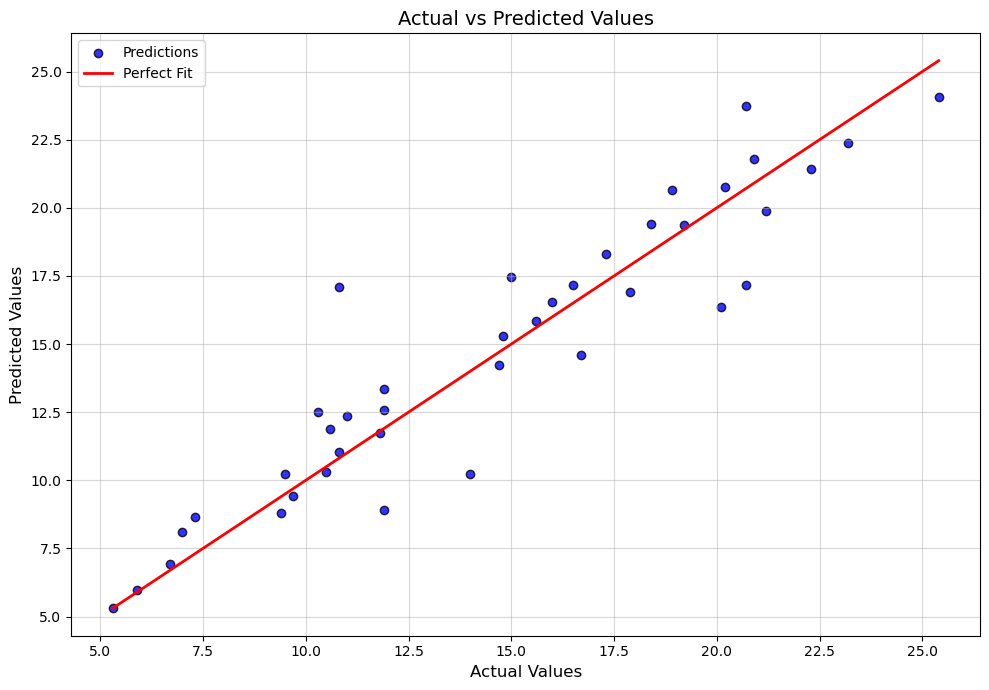

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(output_test, output_pred, color='blue', alpha=0.8, edgecolor='k', label='Predictions')
plt.plot([output_test.min(), output_test.max()], [output_test.min(), output_test.max()], color='red', linewidth=2, label='Perfect Fit')

# Plot details
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()